In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('vehicles_cleaned.csv')
data

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,postmd
0,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al,32.590000,-85.480000,2021-05-04T12:31:18-0500,May-04
1,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al,32.590000,-85.480000,2021-05-04T12:31:08-0500,May-04
2,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,32.592000,-85.518900,2021-05-03T14:02:03-0500,May-03
3,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,32.590000,-85.480000,2021-05-03T13:41:25-0500,May-03
4,https://auburn.craigslist.org/cto/d/opelika-19...,auburn,4500,1992.0,jeep,cherokee,excellent,6 cylinders,gas,192000.0,clean,automatic,4wd,NaN,NaN,al,32.645400,-85.378300,2021-05-03T07:38:05-0500,May-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191282,https://wyoming.craigslist.org/cto/d/cheyenne-...,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,hatchback,red,wy,41.143700,-104.796200,2021-04-05T18:10:52-0600,April-06
191283,https://wyoming.craigslist.org/cto/d/kirby-jag...,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,convertible,white,wy,43.642930,-108.222976,2021-04-05T16:29:38-0600,April-05
191284,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,29590,2016.0,toyota,4runner sr5 sport utility,good,6 cylinders,gas,53475.0,clean,automatic,NaN,SUV,black,wy,33.786500,-84.445400,2021-04-05T02:41:28-0600,April-05
191285,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,32990,2016.0,infiniti,qx80 sport utility 4d,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,wy,33.779214,-84.411811,2021-04-05T02:41:26-0600,April-05


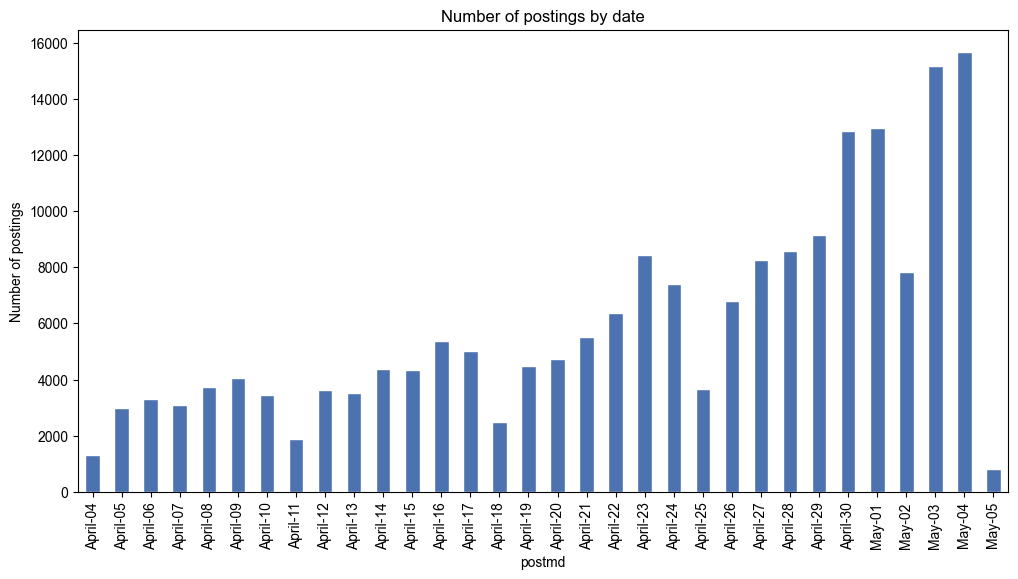

In [4]:
# Check number of listings for each day of data entry
fig,ax=plt.subplots(figsize=(12,6))
sns.set()
data.postmd.value_counts().sort_index().plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by date')
plt.grid(None)

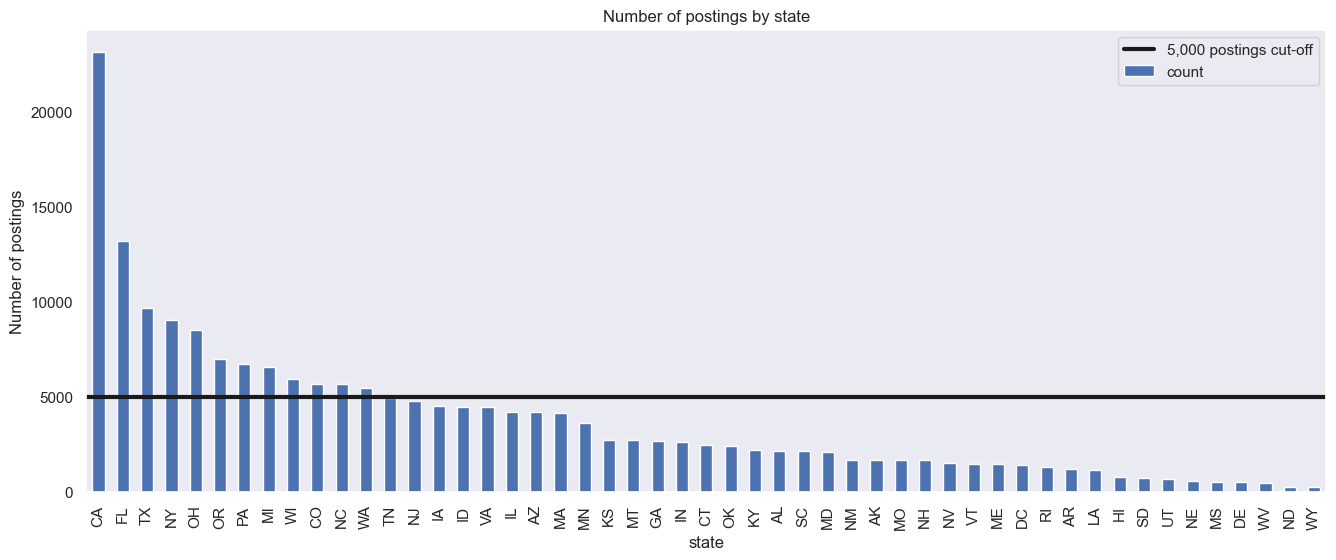

In [6]:
# Check number of postings per state
fig,ax=plt.subplots(figsize=(16,6))
data.state.str.upper().value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Number of postings')
plt.title('Number of postings by state')
y=[5000,5000]
x=[-1,100]
_=plt.plot(x,y,color='k',label='5,000 postings cut-off',linewidth=3)
_=plt.legend()
plt.grid(None)

There are a number of states with much smaller amounts of used car postings compared to the heavy used car availability states. Therefore, in the spirit of increasing used car sales, locations with at least 5,000 used car postings during the April-May period will be focused. The aim is to target high used cars availability states.

In [7]:
# get the states with <5000 used car postings
data['state'].apply(lambda x: x.upper()).value_counts()>=5000

state
CA     True
FL     True
TX     True
NY     True
OH     True
OR     True
PA     True
MI     True
WI     True
CO     True
NC     True
WA     True
TN    False
NJ    False
IA    False
ID    False
VA    False
IL    False
AZ    False
MA    False
MN    False
KS    False
MT    False
GA    False
IN    False
CT    False
OK    False
KY    False
AL    False
SC    False
MD    False
NM    False
AK    False
MO    False
NH    False
NV    False
VT    False
ME    False
DC    False
RI    False
AR    False
LA    False
HI    False
SD    False
UT    False
NE    False
MS    False
DE    False
WV    False
ND    False
WY    False
Name: count, dtype: bool

In [8]:
# Filter out the states with <5000 used car postings
datav2 = data.loc[~(data.state.isin(['tn', 'nj', 'ia', 'id', 'va', 'il', 'az', 'ma', 'mn', 'ks', 'mt', 'ga',
       'in', 'ct', 'ok', 'ky', 'al', 'sc', 'md', 'nm', 'ak', 'mo', 'nh', 'nv',
       'vt', 'me', 'dc', 'ri', 'ar', 'la', 'hi', 'sd', 'ut', 'ne', 'ms', 'de',
       'wv', 'nd', 'wy']))]
datav2.shape

(106757, 20)

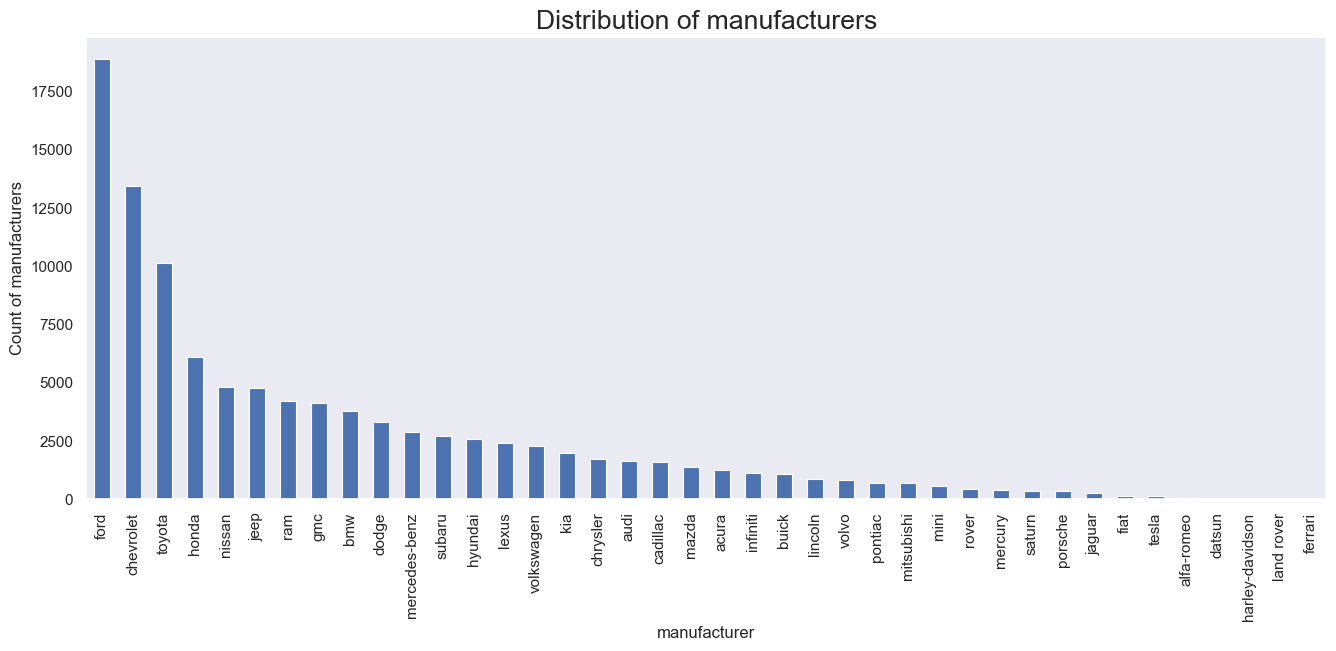

In [9]:
#check the distribution of manufacturers 
fig,ax=plt.subplots(figsize=(16,6))
sns.set_context('paper',font_scale=2)
datav2.manufacturer.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of manufacturers')
plt.title('Distribution of manufacturers')
plt.grid(False)

The top 3 most popularl listed used car manufacturers are ford, chevrolet, and toyota while the least 3 are land rover, aston martin, and datsun.

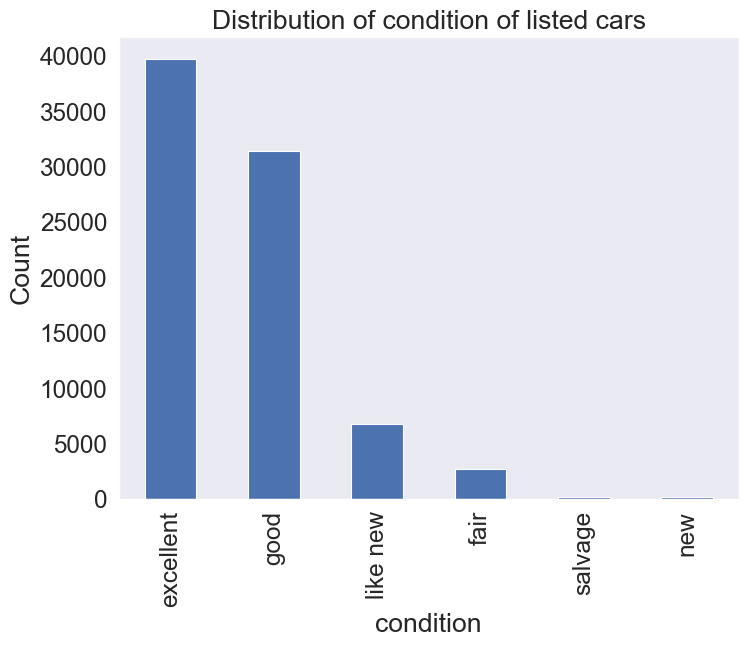

In [13]:
#check the condition of the listed used cars 
fig,ax=plt.subplots(figsize=(8,6))
datav2.condition.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Distribution of condition of listed cars')
plt.grid(None)

Most of the listed cars are in either good or excellent condition. This increases the marketability of the listed cars to buyers.

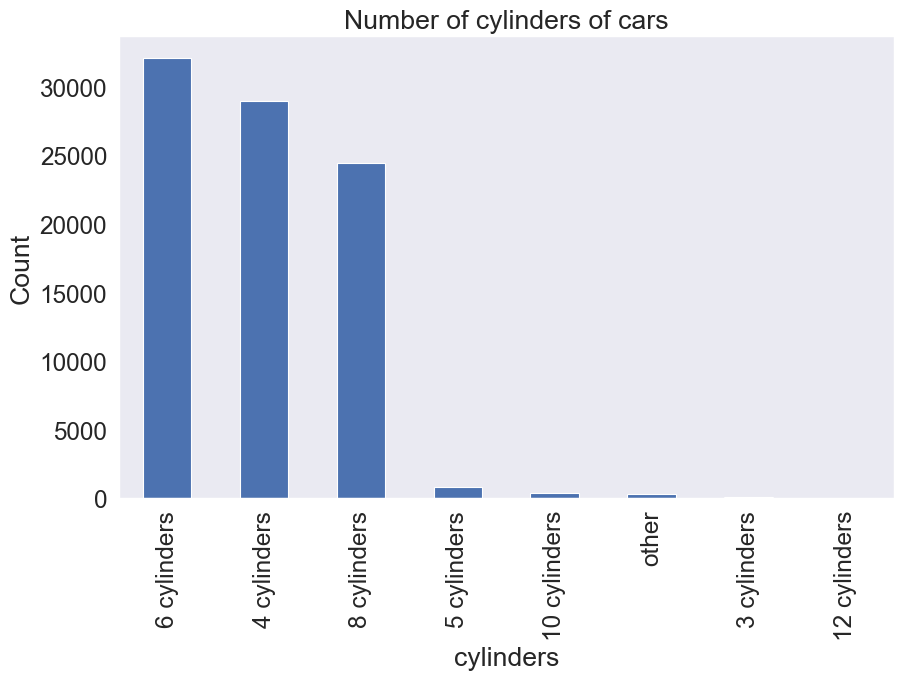

In [14]:
#check the number of cylinders of the listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.cylinders.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Number of cylinders of cars')
plt.grid(None)

Cars with 4, 6, and 8 cylinders are the most popular listed posting on craigslist. This is expected because most cars are equipped with cylinders in that range.

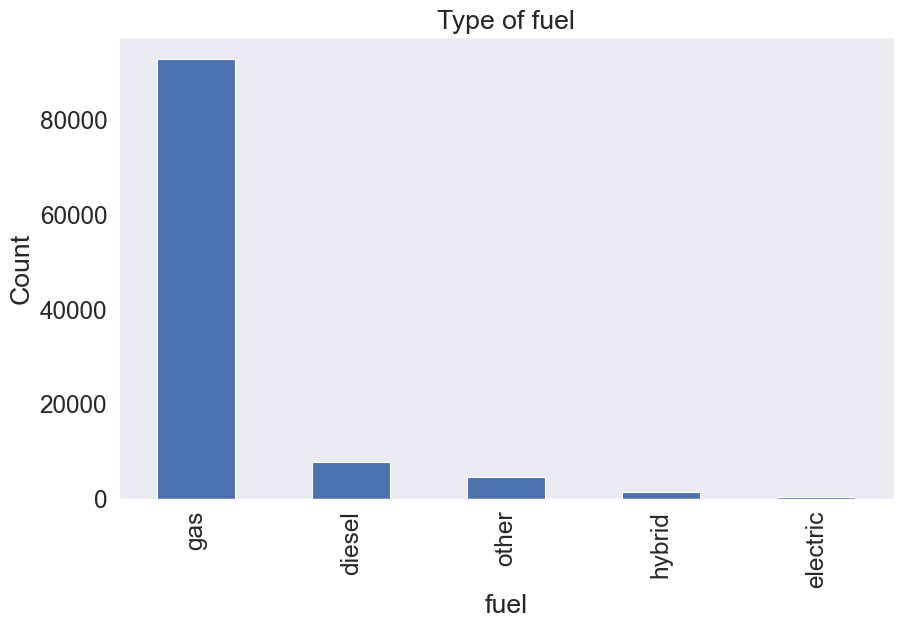

In [15]:
#check the fuel type used for listed used cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.fuel.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count')
plt.title('Type of fuel')
plt.grid(None)

As expected, gas (petrol) is the most common type of fuel for the listed cars.

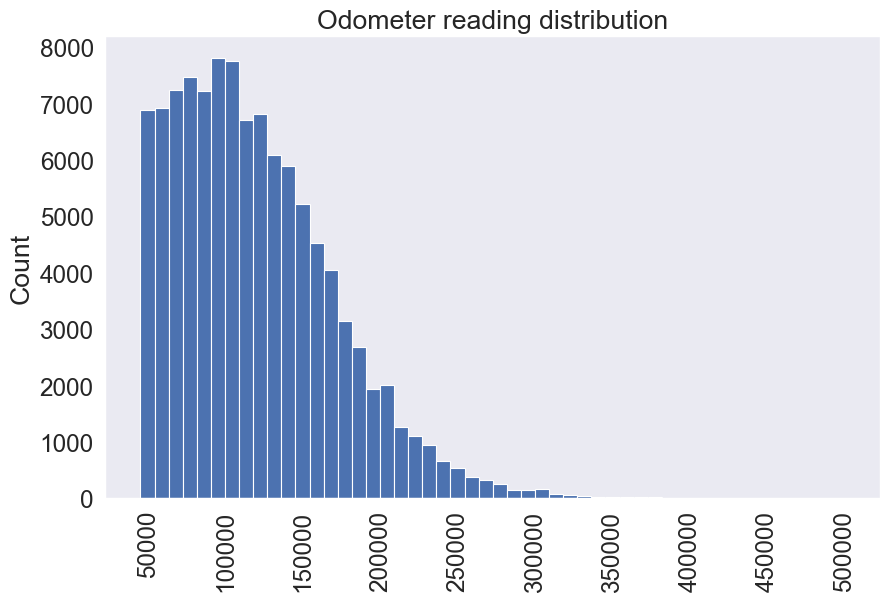

In [16]:
#check the odometer range for the listed cars 
fig,ax=plt.subplots(figsize=(10,6))
datav2.odometer.hist(bins=50)
plt.ylabel('Count')
plt.xticks(rotation=90)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(10000))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(50000))

plt.title('Odometer reading distribution')
plt.grid(None)

The bulk of the used cars odometer reading is clustered around 45,000 - 175,000 km

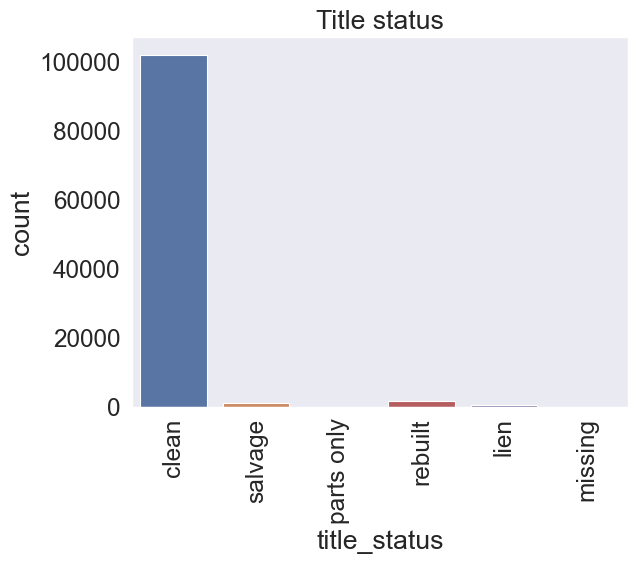

In [17]:
#check the title stutus column
sns.countplot(x='title_status',data=datav2)
plt.title('Title status')
plt.xticks(rotation=90)
plt.grid([])

Clean is the most occuring title status for the used car listings.

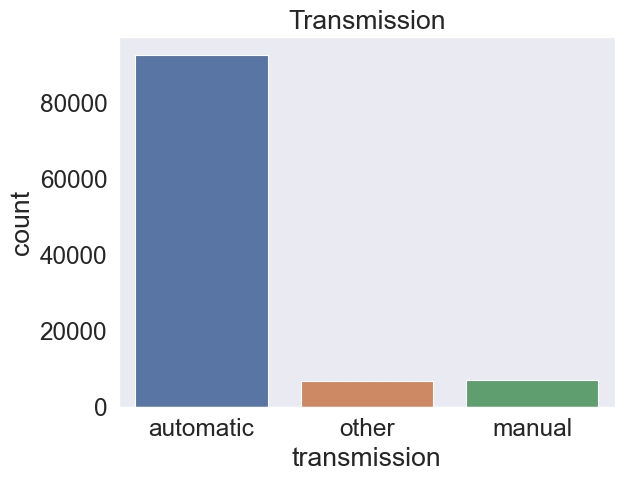

In [18]:
#check the transmission column
sns.countplot(x='transmission',data=datav2)
plt.title('Transmission')
plt.grid([])

The most common car transmission type is automatic as expected.

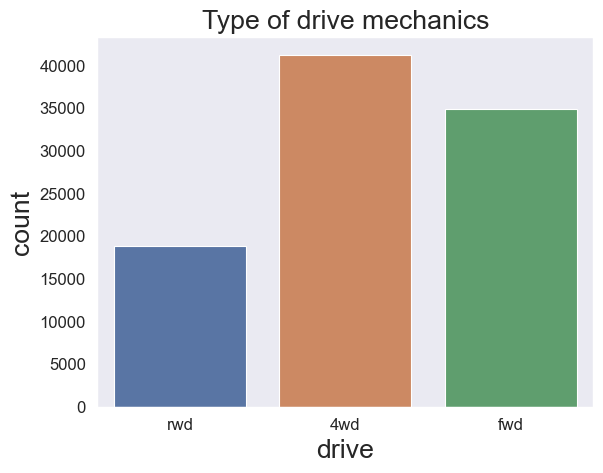

In [20]:
#check the drive column
sns.countplot(x='drive',data=datav2)
plt.title('Type of drive mechanics')
plt.tick_params(labelsize=12)
plt.grid([])

There are more fwd and 4wd vehicles than rwd. Front-wheel drives are standarad for many cars, crossovers, and SUVs while 4wd's, designed for severe off-road conditions, are common in most trucks and large SUVs. Rear-wheel drives are are also common in trucks and SUVs.

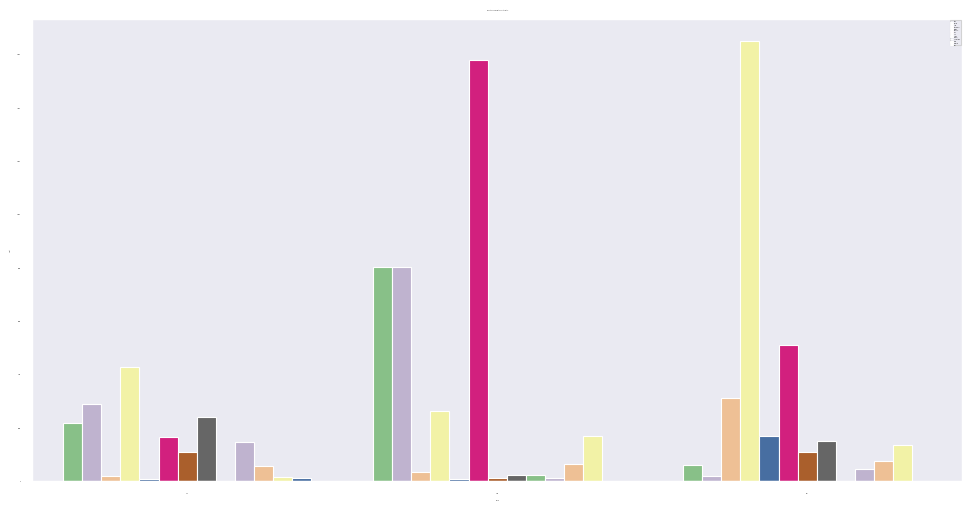

In [27]:
#check drive type and car type distribution
plt.figure(figsize=(16,6))
sns.countplot(x='drive',data=datav2,hue='type',palette='Accent')
sns.set_context('paper',font_scale=0)
plt.title('Drive type and car type distribution')
plt.grid([])

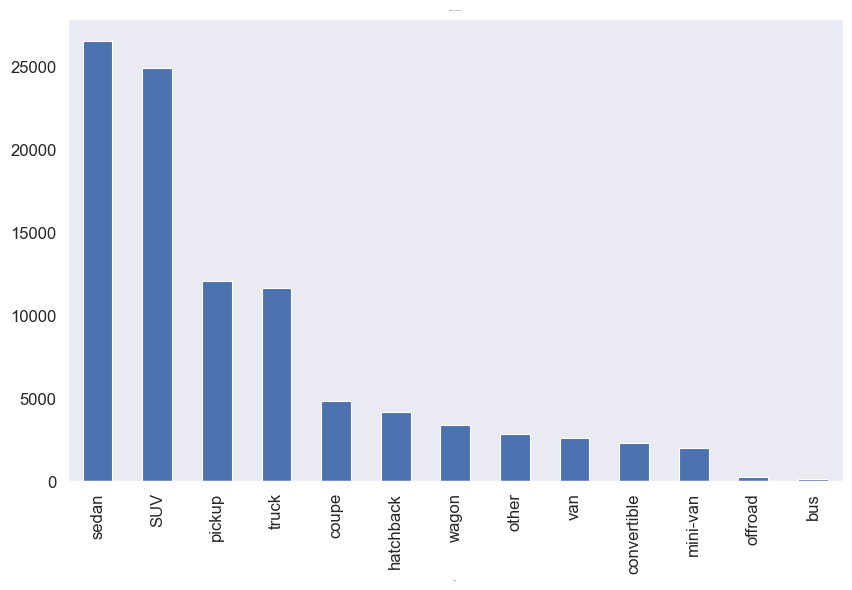

In [28]:
#check the car type distribution
plt.figure(figsize=(10,6))
datav2.type.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car type distribution')
plt.tick_params(labelsize=12)
plt.grid([])

Sedans, SUVs are the two most popular car listings followed by pickups and trucks.

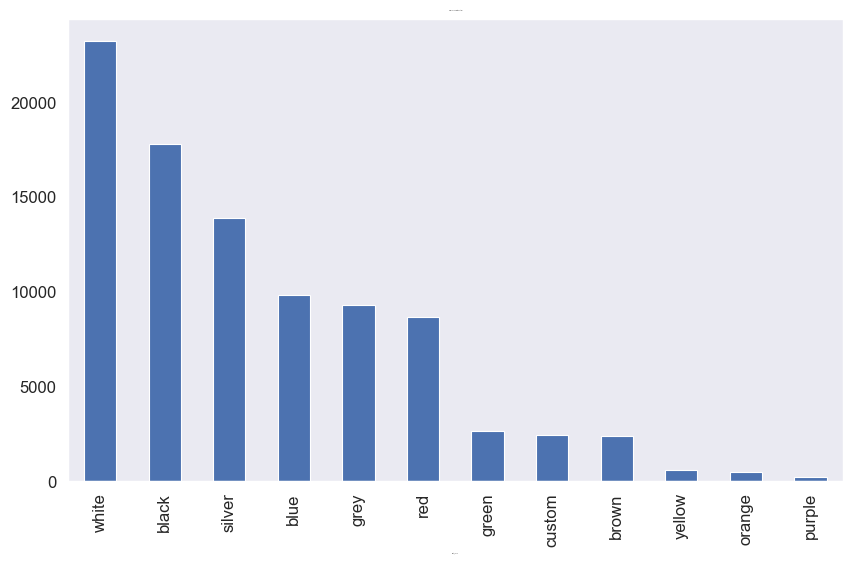

In [29]:
#check the car color distribution
plt.figure(figsize=(10,6))
datav2.paint_color.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Car colors distribution')
plt.tick_params(labelsize=12)
plt.grid([])

White and black are the two most popular colors of cars being listed, followed closely by silver.

Blue, red, and grey are the 3 next popular car colors.

In [31]:
#save data to new file
datav2.to_csv('vehicles_EDA.csv', index=False)
data = pd.read_csv('vehicles_EDA.csv')

In [32]:
#convert the year column from 'float64' to year type as 'int64'
data['year']=pd.to_datetime(data['year'],errors='ignore',format='%y')

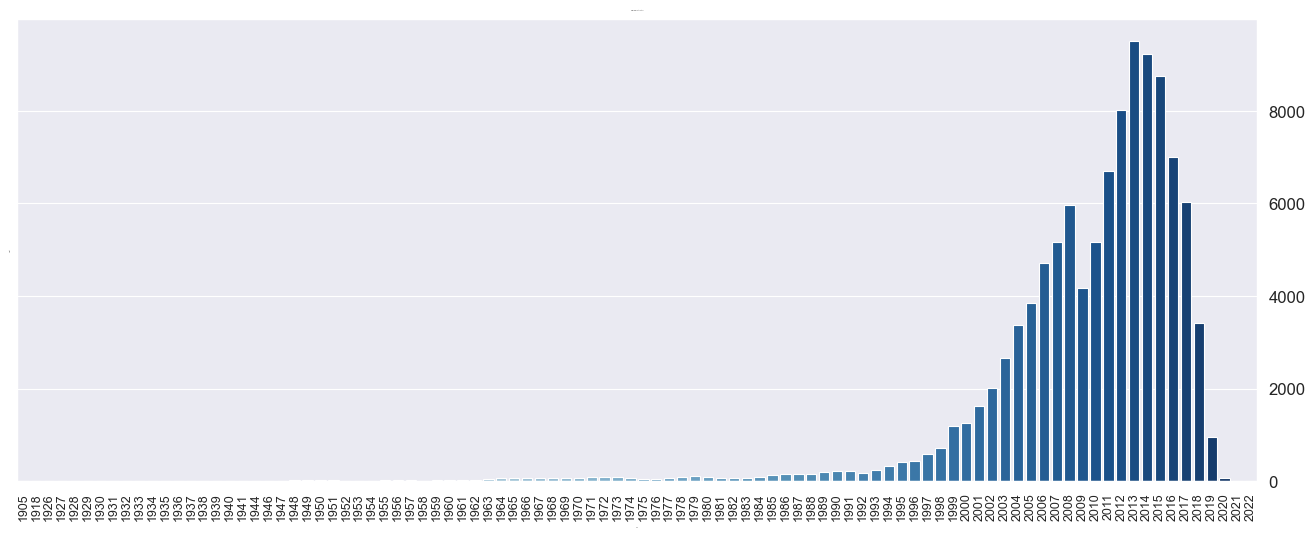

In [33]:
#check the car year distribution
plt.figure(figsize=(16,6))
sns.countplot(x='year',data=data,palette='Blues',dodge=False)
plt.title('Car year distribution')
plt.tick_params(labelsize=12)
plt.xticks(fontsize=9,rotation=90)
plt.tick_params(axis='y', labelleft=False, labelright=True)
plt.show()

The majority of the used cars model year come from between 2011 - 2020. It seems sellers tend to sell their cars within 10 years of ownership.

Distinguish older cars from newer ones. Create two new columns: age of cars by year, and average mileage of car per year

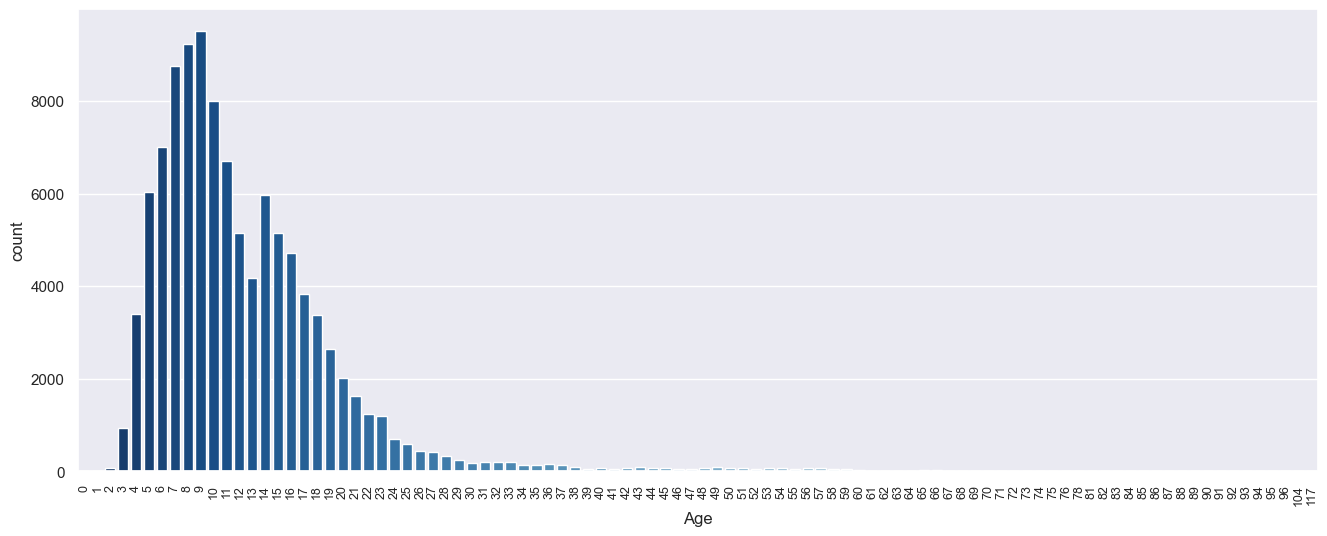

In [34]:
#create Age column
data['Age'] = 2021 - (data['year']-1)
#plot Age distribution
plt.figure(figsize=(16,6))
sns.set()
sns.countplot(x='Age',data=data,palette='Blues_r')
plt.xticks(fontsize=9,rotation=90)
plt.show()

The sentiment around the age at which a car is considered old ranges from 10 to 20 years. When it comes to the prime age of a used car people will buy, the sentiment is based on the condition, history, and sometimes model of the car. Nevertheless, the prime age is around 2-3 years old. For this analysis, cars older than 15 years will be considered old.

The most common listed cars are 4-5 years old

In [35]:
#take out the 0-1 year old cars
data = data.loc[~(data.Age < 2)]

In [36]:
#create average mileage per year column
data['avg_mil'] = data['odometer'] / data['Age']
data['avg_mil']

0         10894.736842
1         10659.842105
2               8613.0
3              11687.5
4               1220.0
              ...     
106752          9067.3
106753          9820.0
106754        2828.125
106755         13521.0
106756    12071.142857
Name: avg_mil, Length: 106753, dtype: object

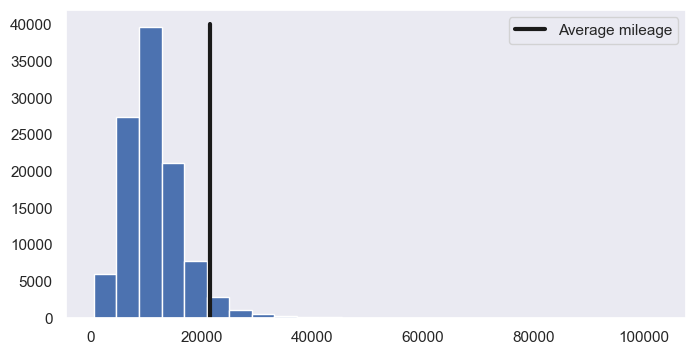

In [37]:
#create a plot of the average mileages
plt.figure(figsize=(8,4))
data.avg_mil.hist(bins=25)
y=[0,40000]
x=[21500,21500]
_=plt.plot(x,y,color='k',label='Average mileage',linewidth=3)
_=plt.legend()
plt.grid(None)

Create a column to classify whether each car's average mileage per year is below or above the average of 13,500 miles (21,500 km) in the US

In [38]:
#create milage rating column
data['mil_rating'] = "below average"
data.loc[data['avg_mil'] > 21500, 'mil_rating'] = "above average"

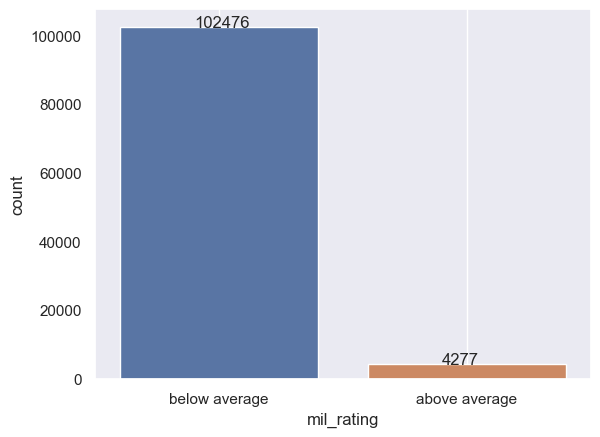

In [39]:
#plot the chart of mileage rating
ax = sns.countplot(x='mil_rating',data=data)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.01))
plt.grid()
plt.show()

Most of the cars have a yearly mileage below the average of 21,500 km per year.

There are still a sizable amount of missing values in the dataset. Before removing the missing rows, rename the categorical variable to custom numbers and see what is going on with the variables. This conversion will also be used for model creation purposes.

In [40]:
#save data to new file
data.to_csv('vehicles_cleaned_v2.csv',index=False)
data = pd.read_csv('vehicles_cleaned_v2.csv')

More Data cleaning for model building                                                                                                                   
Another look at the missing data so it can be properly cleaned to be used in models for price prediction and the simple recommender system.

In [42]:
data.isna().sum()

url                 0
region              0
price               0
year                0
manufacturer     2911
model               0
condition       25826
cylinders       19553
fuel                0
odometer            0
title_status     1022
transmission        0
drive           11720
type             9021
paint_color     15200
state               0
lat               149
long              149
posting_date        0
postmd              0
Age                 0
avg_mil             0
mil_rating          0
dtype: int64

Since it would be cumbersome to fish out the manufacturer from the model for all the missing values, and random manufacturers wouldn't suffice, the rows with missing manufacturers will be taken out.

In [43]:
#drop missing values in manufacturer column
data.dropna(subset=['manufacturer'],axis=0,inplace=True)

Classify manufacturers by their countries

In [44]:
#print unique manufacturer entries
data.manufacturer.unique()

array(['harley-davidson', 'chevrolet', 'mini', 'pontiac', 'volkswagen',
       'lexus', 'nissan', 'toyota', 'ram', 'acura', 'ford', 'kia',
       'honda', 'fiat', 'mercedes-benz', 'gmc', 'infiniti', 'bmw',
       'hyundai', 'tesla', 'jeep', 'subaru', 'mitsubishi', 'dodge',
       'audi', 'cadillac', 'chrysler', 'datsun', 'volvo', 'mazda',
       'porsche', 'lincoln', 'buick', 'rover', 'jaguar', 'mercury',
       'alfa-romeo', 'saturn', 'land rover', 'ferrari'], dtype=object)

In [45]:
#create manufacturer countries, 'Made', column
data_copy = data.copy()
def country(row):
    if row['manufacturer'] in ['harley-davidson', 'chevrolet', 'pontiac', 'ram', 'ford', 'gmc', 'tesla', 'jeep', 'dodge',
                             'cadillac', 'chrysler', 'lincoln', 'buick', 'saturn', 'mercury']:
        val = 'American'
    elif (row['manufacturer'] in ['lexus', 'nissan', 'toyota', 'acura', 'honda', 'infiniti', 'subaru', 'mitsubishi', 
                                'datsun', 'mazda']):
        val = 'Japanese'
    elif (row['manufacturer'] in ['volkswagen', 'mercedes-benz', 'bmw', 'audi', 'porsche']):
        val = 'German'
    elif (row['manufacturer'] in ['ferrari','fiat','alfa-romeo']):
        val = 'Italian'
    elif (row['manufacturer'] in ['kia','hyundai']):
        val = 'Korean'
    elif (row['manufacturer'] in ['volvo']):
        val = 'Swedish'
    elif (row['manufacturer'] in ['rover','mini','land rover', 'jaguar']):
        val = 'English'
    return val
data_copy['Made'] = data_copy.apply(country, axis=1)
data_copy.head()

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,paint_color,state,lat,long,posting_date,postmd,Age,avg_mil,mil_rating,Made
0,https://bakersfield.craigslist.org/ctd/d/bloom...,bakersfield,11975,2003,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,...,black,ca,34.070612,-117.383384,2021-05-04T12:26:43-0700,May-04,19,10894.736842,below average,American
1,https://bakersfield.craigslist.org/ctd/d/stant...,bakersfield,21950,2003,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,...,grey,ca,33.794656,-117.992994,2021-05-04T12:04:51-0700,May-04,19,10659.842105,below average,American
2,https://bakersfield.craigslist.org/ctd/d/baker...,bakersfield,15590,2015,mini,hardtop 2 door cooper s,good,NaN,other,60291.0,...,red,ca,35.380000,-119.020000,2021-05-04T11:41:15-0700,May-04,7,8613.000000,below average,English
3,https://bakersfield.craigslist.org/ctd/d/bloom...,bakersfield,3975,2006,pontiac,g6,excellent,4 cylinders,gas,187000.0,...,silver,ca,34.070612,-117.383384,2021-05-04T11:35:04-0700,May-04,16,11687.500000,below average,American
4,https://bakersfield.craigslist.org/cto/d/lamon...,bakersfield,8000,1972,chevrolet,chevelle,fair,8 cylinders,gas,61000.0,...,white,ca,35.248476,-118.936316,2021-05-04T11:30:14-0700,May-04,50,1220.000000,below average,American


Remove the 'lat' and 'long' columns as they are not needed.

For the missing values in the remainder of the columns, substitute them with a random variable from its unique items based on their current probability.

In [46]:
#drop lat and long columns
data_copy.drop(columns=['lat','long'],axis=1, inplace=True)

#normalize the condition value counts and save into a dataframe
cond_prob = pd.DataFrame(list(data_copy.condition.value_counts(normalize=True).items()),columns = ['condition','prob'])
cond_prob

,condition,prob
0,excellent,0.494423
1,good,0.384984
2,like new,0.083649
3,fair,0.032863
4,salvage,0.002149
5,new,0.001932


In [47]:
#substitute missing values in condition to random states based on their probabilities
data_copy.loc[data_copy.condition.isna(), 'condition'] = np.random.choice(cond_prob.condition, 
                                                size=data_copy.condition.isna().sum(),
                                                replace=True, 
                                                p=cond_prob.prob)

Text(0.5, 1.0, 'Post conversion')

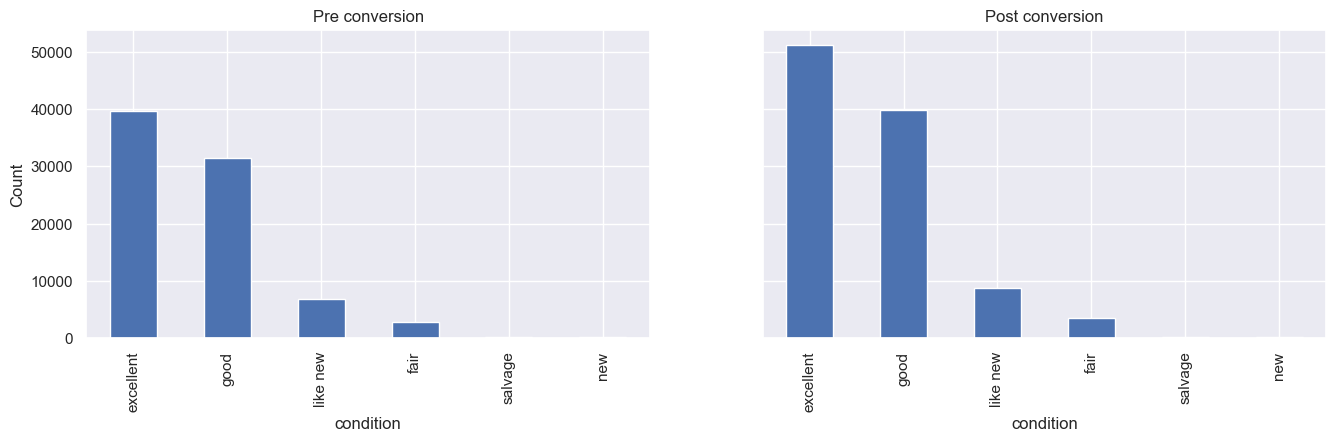

In [48]:
#peep to see result of substitution
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4),sharey=True)
datav2.condition.value_counts().sort_values(ascending=False).plot(kind='bar',ax=ax1)
data_copy.condition.value_counts().sort_values(ascending=False).plot(kind='bar',ax=ax2)
ax1.set_ylabel('Count')
ax1.set_title('Pre conversion')
ax2.set_title('Post conversion')

In [49]:
#normalize the cylinders value counts and save into a dataframe
cyl_prob = pd.DataFrame(list(data_copy.cylinders.value_counts(normalize=True).items()),columns = ['cylinders','prob'])
#substitute missing values in cylinder to random states based on their probabilities
data_copy.loc[data_copy.cylinders.isna(), 'cylinders'] = np.random.choice(cyl_prob.cylinders, 
                                                size=data_copy.cylinders.isna().sum(),
                                                replace=True, 
                                                p=cyl_prob.prob)

In [50]:
#normalize the title status value counts and save into a dataframe
ts_prob = pd.DataFrame(list(data_copy.title_status.value_counts(normalize=True).items()),columns = ['ts','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.title_status.isna(), 'title_status'] = np.random.choice(ts_prob.ts, 
                                                size=data_copy.title_status.isna().sum(),
                                                replace=True, 
                                                p=ts_prob.prob)

In [51]:
#normalize the drive value counts and save into a dataframe
dr_prob = pd.DataFrame(list(data_copy.drive.value_counts(normalize=True).items()),columns = ['drive','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.drive.isna(), 'drive'] = np.random.choice(dr_prob.drive, 
                                                size=data_copy.drive.isna().sum(),
                                                replace=True, 
                                                p=dr_prob.prob)

In [52]:
#normalize the type value counts and save into a dataframe
type_prob = pd.DataFrame(list(data_copy.type.value_counts(normalize=True).items()),columns = ['type','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.type.isna(), 'type'] = np.random.choice(type_prob.type, 
                                                size=data_copy.type.isna().sum(),
                                                replace=True, 
                                                p=type_prob.prob)

In [53]:
#normalize the color value counts and save into a dataframe
pc_prob = pd.DataFrame(list(data_copy.paint_color.value_counts(normalize=True).items()),columns = ['color','prob'])
#substitute missing values in title_status to random states based on their probabilities
data_copy.loc[data_copy.paint_color.isna(), 'paint_color'] = np.random.choice(pc_prob.color, 
                                                size=data_copy.paint_color.isna().sum(),
                                                replace=True, 
                                                p=pc_prob.prob)

In [54]:
data_copy.isna().sum()

url             0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
posting_date    0
postmd          0
Age             0
avg_mil         0
mil_rating      0
Made            0
dtype: int64

In [55]:
# classify car type
def luxury(car):
  if car['type'] in ['sedan', 'convertible','coupe','hatchback','other']:
    cal='luxury_small'
  elif (car['type'] in ['SUV','wagon']):
    cal='luxury_large'
  elif (car['type'] in ['pickup','truck','offroad']):
    cal='non-luxury_small'
  elif (car['type'] in ['van','mini-van','bus']):
    cal='non-luxury_large'
  return cal 
data_copy['type_group'] = data_copy.apply(luxury, axis=1)
data_copy.head() 

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,type,paint_color,state,posting_date,postmd,Age,avg_mil,mil_rating,Made,type_group
0,https://bakersfield.craigslist.org/ctd/d/bloom...,bakersfield,11975,2003,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,...,pickup,black,ca,2021-05-04T12:26:43-0700,May-04,19,10894.736842,below average,American,non-luxury_small
1,https://bakersfield.craigslist.org/ctd/d/stant...,bakersfield,21950,2003,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,...,truck,grey,ca,2021-05-04T12:04:51-0700,May-04,19,10659.842105,below average,American,non-luxury_small
2,https://bakersfield.craigslist.org/ctd/d/baker...,bakersfield,15590,2015,mini,hardtop 2 door cooper s,good,8 cylinders,other,60291.0,...,hatchback,red,ca,2021-05-04T11:41:15-0700,May-04,7,8613.000000,below average,English,luxury_small
3,https://bakersfield.craigslist.org/ctd/d/bloom...,bakersfield,3975,2006,pontiac,g6,excellent,4 cylinders,gas,187000.0,...,sedan,silver,ca,2021-05-04T11:35:04-0700,May-04,16,11687.500000,below average,American,luxury_small
4,https://bakersfield.craigslist.org/cto/d/lamon...,bakersfield,8000,1972,chevrolet,chevelle,fair,8 cylinders,gas,61000.0,...,sedan,white,ca,2021-05-04T11:30:14-0700,May-04,50,1220.000000,below average,American,luxury_small


In [56]:
# classify car color
def color(paint):
  if paint['paint_color'] in ['white','silver','yellow','orange','green','custom']:
    col='light color'
  elif (paint['paint_color'] in ['black','red','blue','purple','grey','brown']):
    col='dark color'
  return col 
data_copy['color_group'] = data_copy.apply(color, axis=1)
data_copy.head() 

,url,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,paint_color,state,posting_date,postmd,Age,avg_mil,mil_rating,Made,type_group,color_group
0,https://bakersfield.craigslist.org/ctd/d/bloom...,bakersfield,11975,2003,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,...,black,ca,2021-05-04T12:26:43-0700,May-04,19,10894.736842,below average,American,non-luxury_small,dark color
1,https://bakersfield.craigslist.org/ctd/d/stant...,bakersfield,21950,2003,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,...,grey,ca,2021-05-04T12:04:51-0700,May-04,19,10659.842105,below average,American,non-luxury_small,dark color
2,https://bakersfield.craigslist.org/ctd/d/baker...,bakersfield,15590,2015,mini,hardtop 2 door cooper s,good,8 cylinders,other,60291.0,...,red,ca,2021-05-04T11:41:15-0700,May-04,7,8613.000000,below average,English,luxury_small,dark color
3,https://bakersfield.craigslist.org/ctd/d/bloom...,bakersfield,3975,2006,pontiac,g6,excellent,4 cylinders,gas,187000.0,...,silver,ca,2021-05-04T11:35:04-0700,May-04,16,11687.500000,below average,American,luxury_small,light color
4,https://bakersfield.craigslist.org/cto/d/lamon...,bakersfield,8000,1972,chevrolet,chevelle,fair,8 cylinders,gas,61000.0,...,white,ca,2021-05-04T11:30:14-0700,May-04,50,1220.000000,below average,American,luxury_small,light color


In [57]:
#save data file and load
data_copy.to_csv('vehicles_rec.csv',index=False)